In [11]:
%matplotlib inline
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec
from matplotlib import patches as mpatches

import glob
import numpy as np
import os
import scipy

%load_ext autoreload
%autoreload 2
import sys

sys.path.insert(1, '../code')
import plotter
import utils
from utils import *

#sys.path.insert(1, '../../clust')
#import clustering_statistics as cs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
statistics = ['wp', 'xi', 'xi2', 'upf', 'mcf']

In [3]:
mocktag='_uchuu'
y_vals_uchuu = []
for statistic in statistics:    
    result_dir=f"/home/users/ksf293/clust/results{mocktag}/results_{statistic}"
    fn_stat=f"{result_dir}/{statistic}{mocktag}.dat"
    r, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
    y_vals_uchuu.append(y_vals)
y_vals_uchuu = np.array(y_vals_uchuu)

In [4]:
print(y_vals_uchuu.shape)

(5, 9)


In [5]:
y_vals_uchuu

array([[ 1.377465e+03,  6.909343e+02,  2.844182e+02,  1.312288e+02,
         7.962504e+01,  4.805837e+01,  2.636845e+01,  1.214156e+01,
         4.037068e+00],
       [ 1.633285e+02,  7.910644e+01,  3.521928e+01,  1.614695e+01,
         8.835314e+00,  3.691585e+00,  1.162959e+00,  3.048409e-01,
         5.739798e-02],
       [ 2.209789e+02,  8.661299e+01,  4.946812e+01,  1.921404e+01,
         5.767726e+00,  1.187772e+00, -1.601353e-01, -1.598505e-01,
        -5.536359e-02],
       [ 9.175870e-01,  5.867840e-01,  2.306730e-01,  1.320500e-01,
         4.609700e-02,  1.769300e-02,  6.113000e-03,  1.168000e-03,
         2.530000e-04],
       [ 7.690522e-01,  7.518921e-01,  7.285353e-01,  7.245071e-01,
         7.158167e-01,  6.754640e-01,  7.625087e-01,  9.316538e-01,
         9.844690e-01]])

In [44]:
mock_tag_train = '_aemulus_Msatmocks_train'
id_pairs_train = load_id_pairs_train(mock_tag_train)
training_dir_base = f'/home/users/ksf293/clust/results{mock_tag_train}'
n_closest = 2000
id_pairs_closest, idxs_closest = get_closest_models(statistics, y_vals_uchuu, id_pairs_train, 
                                                    training_dir_base, n_closest=n_closest)

original number of training ID pairs: 4000
Deleted bad ID pairs with indices [1296, 1335]
N train: 3998


In [7]:
# y_arr = []
# for i, statistic in enumerate(statistics):
#     _, ys = load_statistics(statistic, training_dir_base, id_pairs_train)
#     y_arr.append(ys)
# y_arr = np.array(y_arr)

In [8]:
# y_arr.shape

In [9]:
def plot_statistics_closest(statistic, r, y_vals, y_arr_closest, y_arr_other, ylabel_note='', 
                            alpha=0.1):
    plt.figure(figsize=(8,6))
    ax = plt.gca()
    
    multiplier = 1.0
    ylabel = stat_labels[statistic]
    if statistic=='xi2':
        multiplier = r**2
        #ax.set_ylim(-3,3)
        ylabel = r'$s^2$' + ylabel
            
    for i in range(len(y_arr_other)):
        plt.plot(r, multiplier*y_arr_other[i], color='grey', alpha=alpha, lw=0.2)

    for i in range(len(y_arr_closest)):
        plt.plot(r, multiplier*y_arr_closest[i], color='mediumaquamarine', alpha=alpha, lw=0.2)
    
    y_all = np.vstack((y_arr_other, y_arr_closest))
    y_all_mean = np.mean(y_all, axis=0)
    plt.plot(r, multiplier*y_all_mean, color='black', lw=2, label='mean of all')

    y_closest_mean = np.mean(y_arr_closest, axis=0)
    plt.plot(r, multiplier*y_closest_mean, color='green', lw=2, label='mean of closest')

    plt.plot(r, multiplier*y_vals, color='blue', lw=2, label='uchuu mock data')
    
    plt.xscale(scale_dict[statistic][0])
    plt.yscale(scale_dict[statistic][1])
    
    plt.xlabel(r_labels[statistic])
    plt.ylabel(ylabel + ylabel_note)
    
    handles, labels = ax.get_legend_handles_labels()
    line = Line2D([0], [0], color='grey', label='measurement on unique\ncosmo+HOD model', lw=0.5)
    handles.insert(0,line) 
    plt.legend(handles=handles, loc='best', fontsize=12)

wp
xi
xi2
upf
mcf


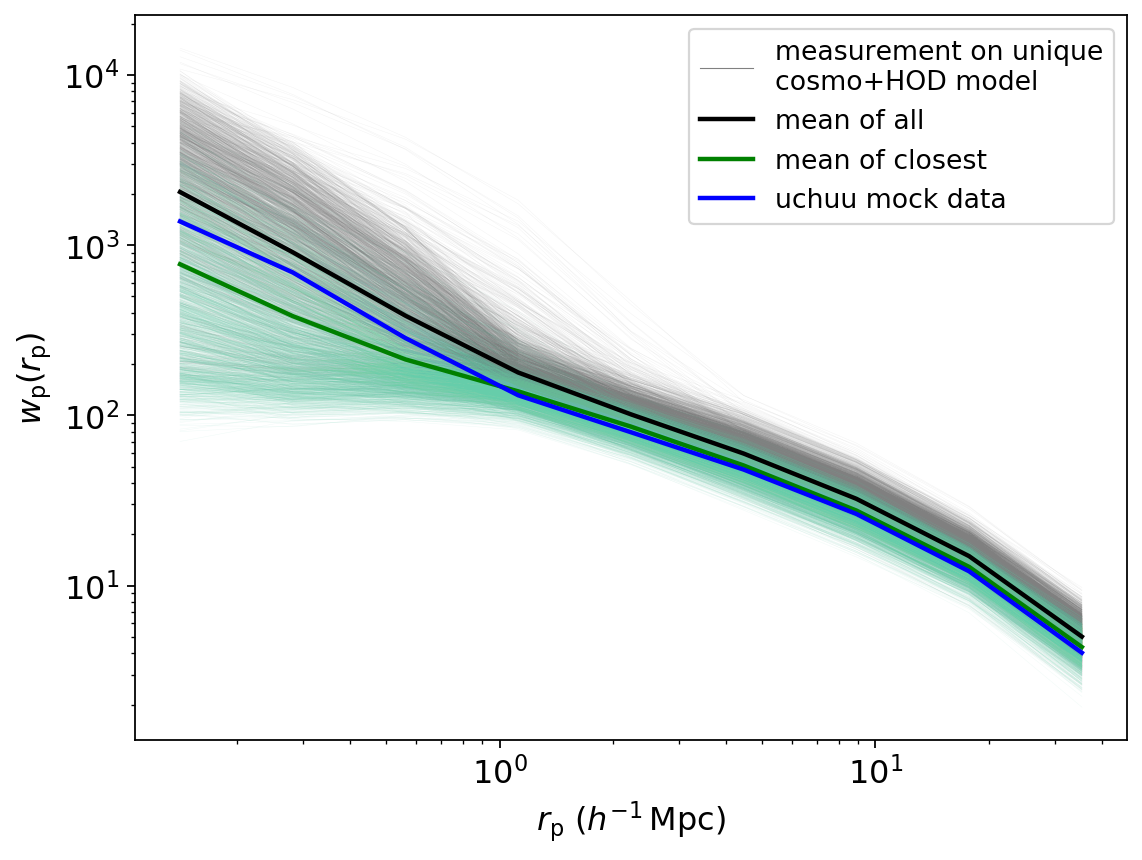

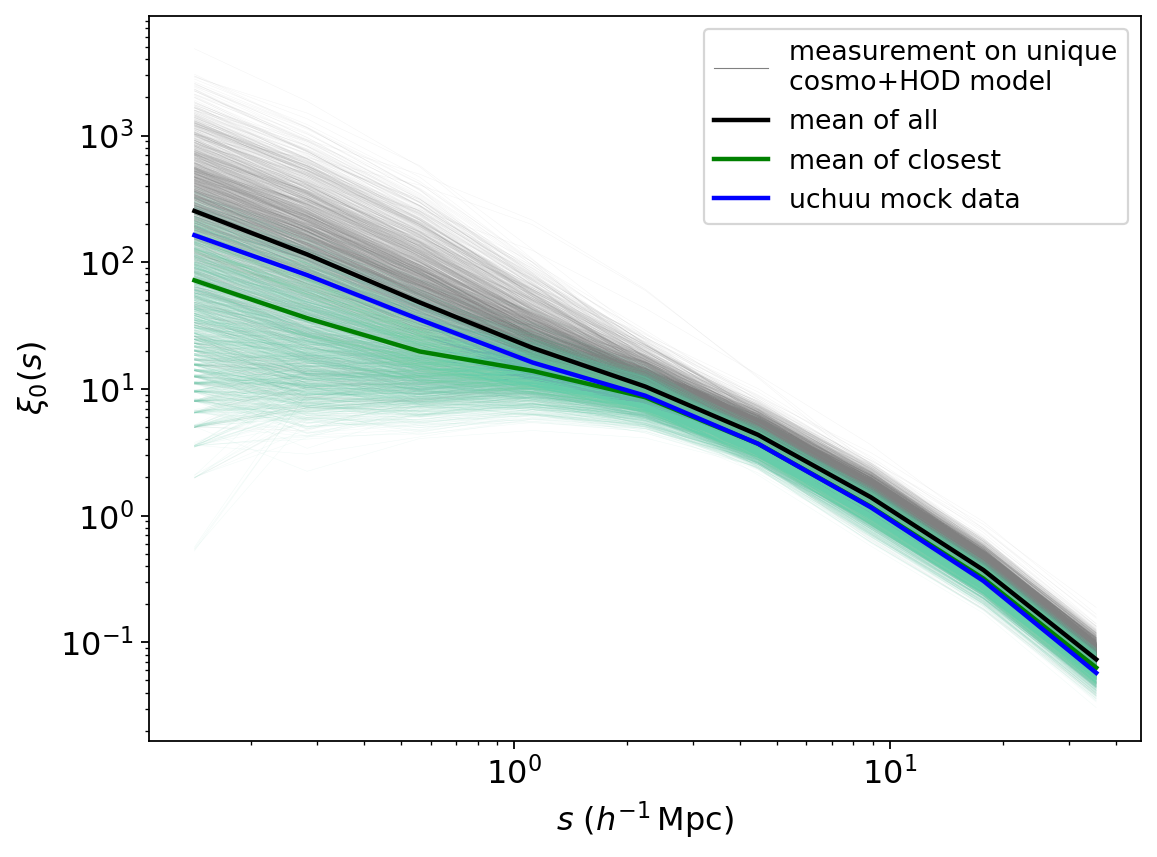

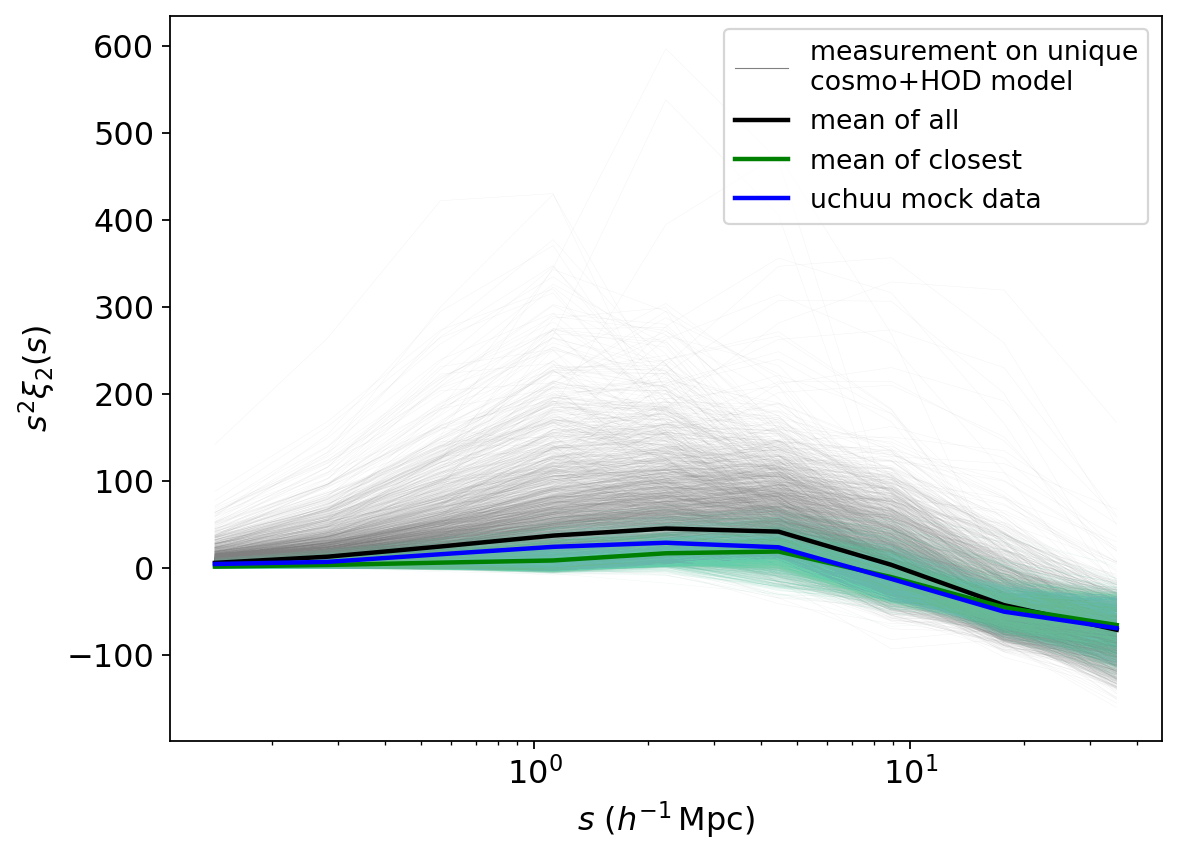

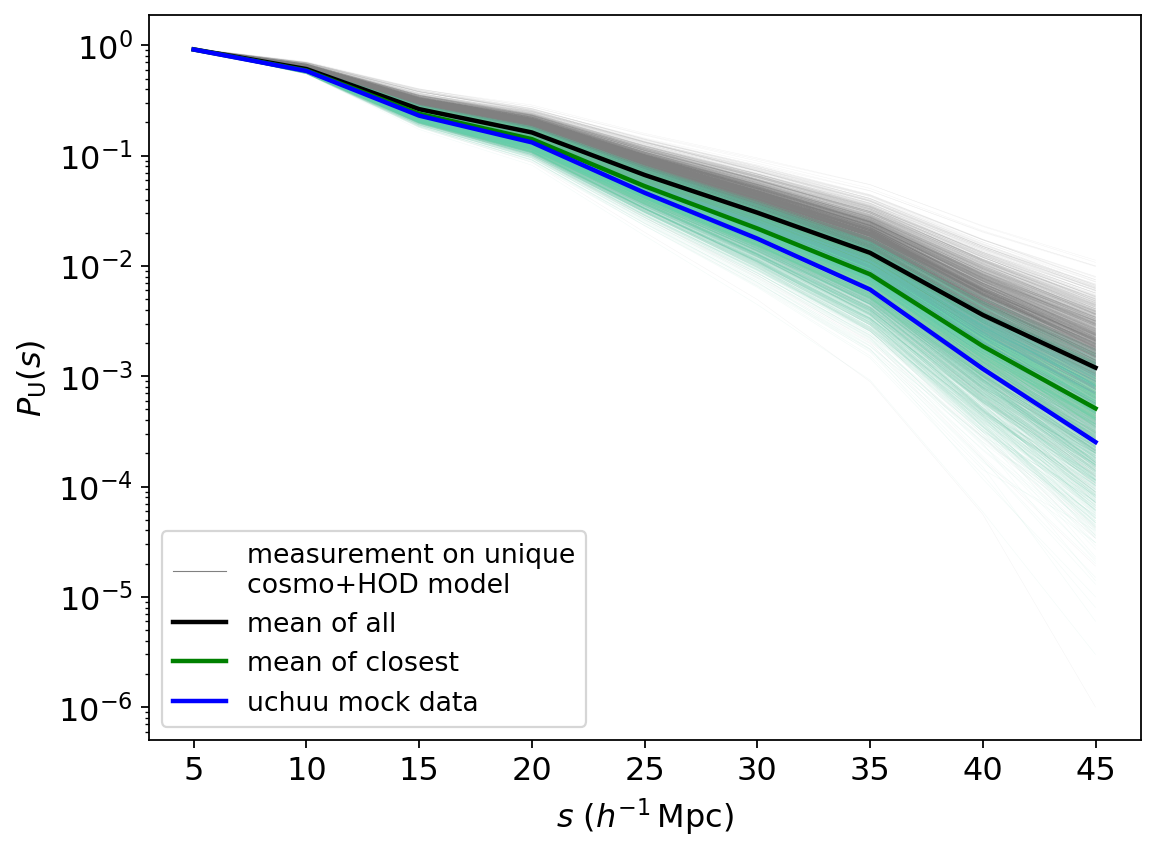

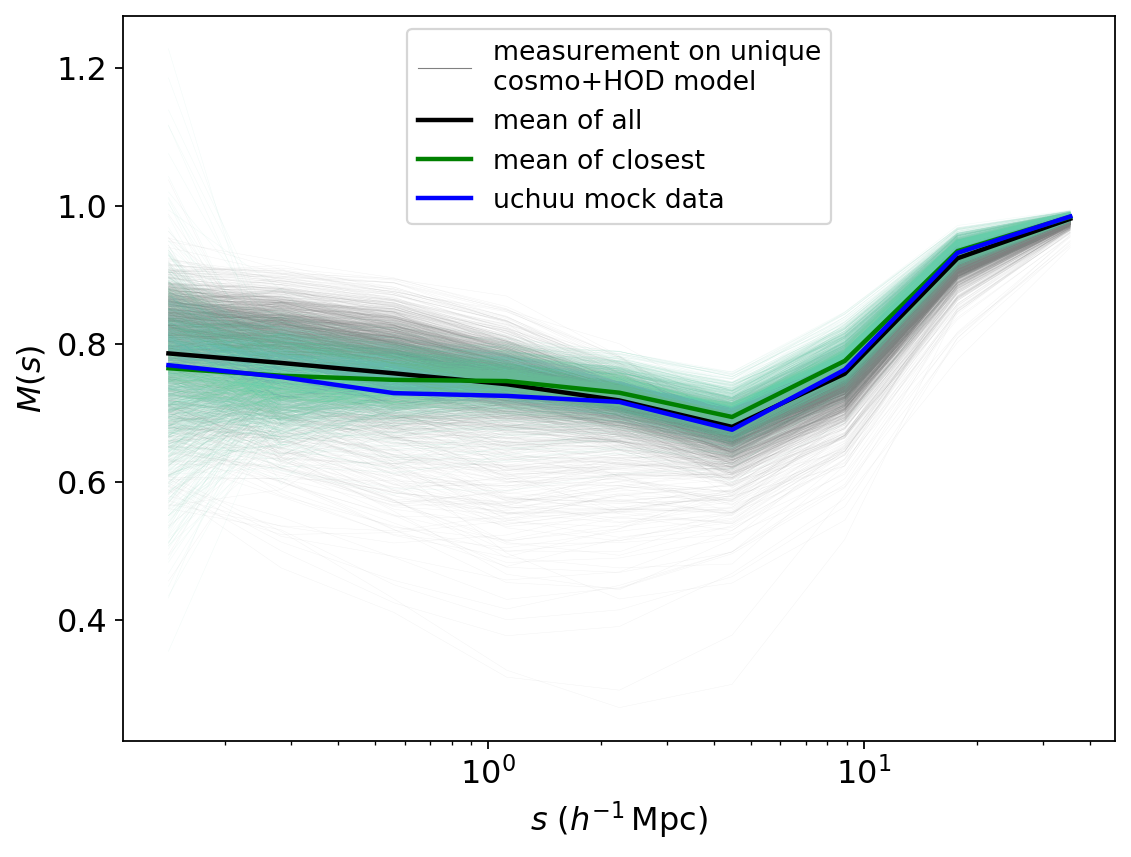

In [42]:
for i, statistic in enumerate(statistics):
    print(statistic)
    r_arr, y_arr = load_statistics(statistic, training_dir_base, id_pairs_train)
    r = r_arr[0]
    y_arr_closest = y_arr[idxs_closest]
    idxs_all = np.arange(len(id_pairs_train))
    idx_other = idxs_all[np.in1d(idxs_all, idxs_closest, invert=True)]
    y_arr_other = y_arr[idx_other]
    plot_statistics_closest(statistic, r, y_vals_uchuu[i], y_arr_closest, y_arr_other)

In [46]:
fn_ids = f'../tables/id_pairs_uchuunclosest{n_closest}.txt'
np.savetxt(fn_ids, id_pairs_closest, delimiter=',', fmt=['%d', '%d'])

Something looks weird in smallest bin of xi(0) - they are all at the same few points?? investigate! TODO

In [12]:
statistic = 'xi'
rs, ys = load_statistics(statistic, training_dir_base, id_pairs_train)

In [16]:
rs.shape, ys.shape

((3998, 9), (3998, 9))

Text(0, 0.5, 'xi0')

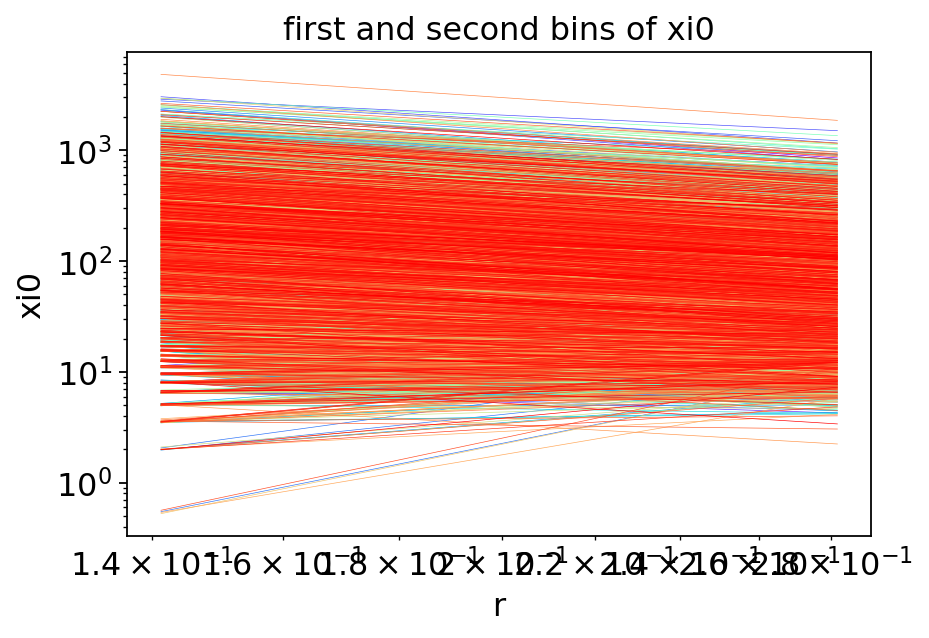

In [37]:
plt.title('first and second bins of xi0')

cosmos = np.arange(40)
locs_norm = matplotlib.colors.Normalize(vmin=np.min(cosmos), vmax=np.max(cosmos))
cmap = matplotlib.cm.get_cmap('rainbow')
for i in range(len(id_pairs_train)):
    cosmo, hod = id_pairs_train[i]
    color = cmap(locs_norm(cosmo))
    plt.plot(rs[i][:2], ys[i][:2], lw=0.3, color=color)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('r')
plt.ylabel('xi0')

Text(0, 0.5, 'number of models with that value')

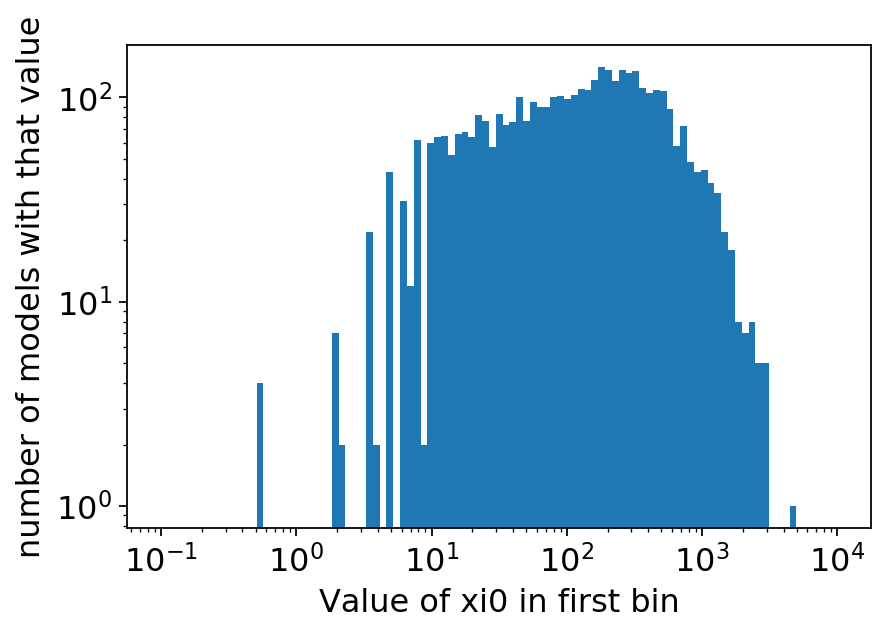

In [29]:
bins = np.logspace(-1,4,100)
plt.hist(ys[:,0], bins=bins)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Value of xi0 in first bin')
plt.ylabel('number of models with that value')

In [32]:
print(sorted(ys[:,0])[:100])

[0.5260429, 0.5397995, 0.5481594, 0.5641832, 1.969901, 1.978922, 1.987493, 1.990289, 1.99727, 2.000809, 2.021306, 2.061672, 2.100062, 3.467263, 3.473295, 3.475192, 3.486794, 3.494151, 3.498285, 3.504184, 3.510486, 3.513583, 3.514604, 3.533064, 3.548024, 3.559672, 3.574244, 3.575565, 3.577488, 3.587922, 3.589973, 3.593676, 3.595287, 3.598876, 3.615583, 3.688477, 3.78115, 4.94997, 4.954034, 4.955527, 4.955784, 4.956608, 4.965322, 4.969557, 4.969557, 4.971055, 4.971314, 4.971365, 4.971676, 4.975503, 4.976745, 4.978661, 4.978713, 4.981044, 4.982029, 4.996152, 5.004484, 5.006778, 5.018687, 5.02078, 5.02455, 5.031576, 5.046138, 5.050934, 5.057848, 5.058534, 5.077173, 5.07935, 5.099366, 5.109732, 5.116908, 5.122754, 5.128286, 5.130597, 5.134794, 5.141421, 5.169934, 5.177815, 5.194986, 5.20171, 6.430141, 6.442929, 6.443379, 6.449431, 6.453685, 6.455878, 6.458266, 6.460654, 6.463173, 6.463948, 6.464142, 6.471708, 6.472291, 6.47255, 6.476823, 6.478119, 6.482268, 6.483565, 6.490706, 6.493045]


Okay they're not exactly the same, but they're in groups

In [41]:
groups = [(0.5, 0.6), (1.9, 2.2), (3.4, 3.8)]
for group in groups:
    print('Group:', group)
    idx_in = (ys[:,0]>=group[0]) & (ys[:,0]<group[1])
    print(id_pairs_train[idx_in])

Group: (0.5, 0.6)
[[   6  620]
 [  28 2801]
 [  30 3063]
 [  35 3566]]
Group: (1.9, 2.2)
[[   6  630]
 [   6  638]
 [   8  866]
 [  19 1911]
 [  26 2655]
 [  30 3057]
 [  34 3451]
 [  36 3605]
 [  39 3969]]
Group: (3.4, 3.8)
[[   6  647]
 [  10 1054]
 [  13 1322]
 [  13 1330]
 [  15 1516]
 [  21 2148]
 [  24 2440]
 [  25 2502]
 [  25 2511]
 [  26 2682]
 [  28 2831]
 [  30 3011]
 [  30 3035]
 [  30 3074]
 [  31 3142]
 [  31 3186]
 [  32 3287]
 [  33 3375]
 [  33 3379]
 [  34 3418]
 [  34 3461]
 [  35 3551]
 [  38 3844]
 [  38 3855]]


No pattern, weird....